<a href="https://colab.research.google.com/github/jiissung/ECON3916-Statistical-Machine-Learning/blob/main/Class%207/Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

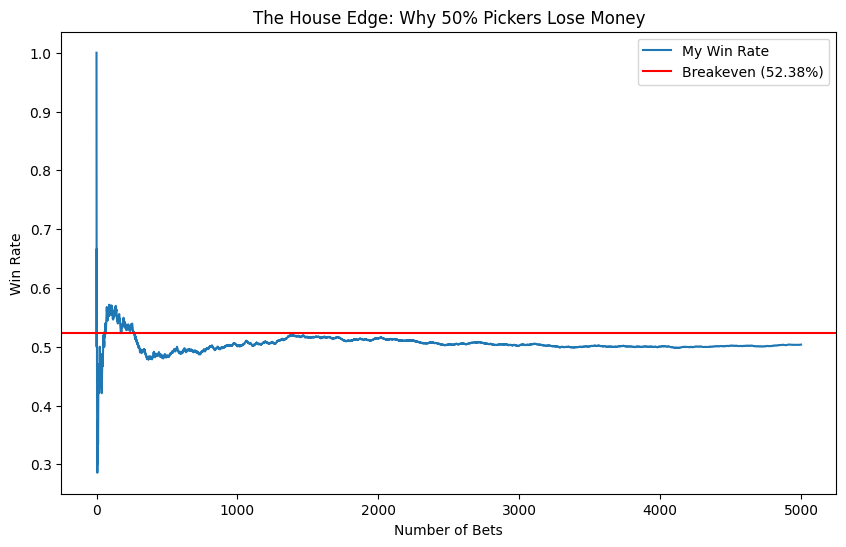

In [15]:
import numpy as np
import matplotlib.pyplot as plt

true_skill = 0.50
breakeven = 0.5238
n_bets = 5000

outcomes = np.random.binomial(1, true_skill, n_bets)

cumulative_wins = np.cumsum(outcomes)
cumulative_win_rate = cumulative_wins / np.arange(1, n_bets + 1)

plt.figure(figsize=(10,6))
plt.plot(cumulative_win_rate, label="My Win Rate")
plt.axhline(breakeven, color='red', label="Breakeven (52.38%)")
plt.legend()
plt.title("The House Edge: Why 50% Pickers Lose Money")
plt.xlabel("Number of Bets")
plt.ylabel("Win Rate")
plt.show()

Sampling Error Audit:
Sample 1: Mean = 34.00% | Error = -1.27%
Sample 2: Mean = 34.00% | Error = -1.27%
Sample 3: Mean = 28.00% | Error = -7.27%


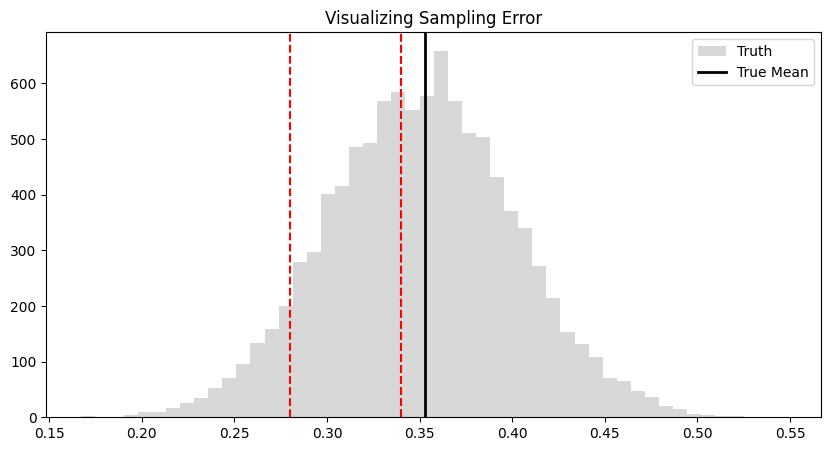

In [17]:
true_mu = 0.3527

samples = []
print(f"Sampling Error Audit:")

for i in range(3):

    # Draws 50 random bets
    sample = np.random.binomial(1, true_mu, 50)

    # Calculates stats
    x_bar = np.mean(sample)
    error = x_bar - true_mu

    print(f"Sample {i+1}: Mean = {x_bar:.2%} | Error = {error:+.2%}")
    samples.append(x_bar)

plt.figure(figsize=(10,5))
plt.hist(np.random.normal(true_mu, 0.05, 10000), bins=50, alpha=0.3, color='gray', label='Truth')
for mean in samples:
    plt.axvline(mean, color='red', linestyle='--')
plt.axvline(true_mu, color='black', linewidth=2, label='True Mean')
plt.title("Visualizing Sampling Error")
plt.legend()
plt.show()

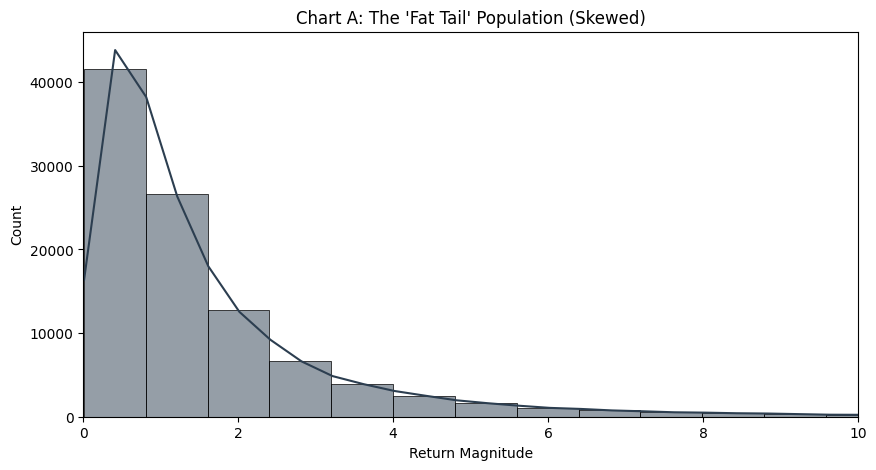

In [18]:
import seaborn as sns

# defining crypto universe
population_data = np.random.lognormal(mean=0, sigma=1.0, size=100000)

# 2. creating visualization
plt.figure(figsize=(10, 5))
sns.histplot(population_data, bins=100, kde=True, color='#2c3e50')
plt.xlim(0, 10)
plt.title("Chart A: The 'Fat Tail' Population (Skewed)")
plt.xlabel("Return Magnitude")
plt.show()

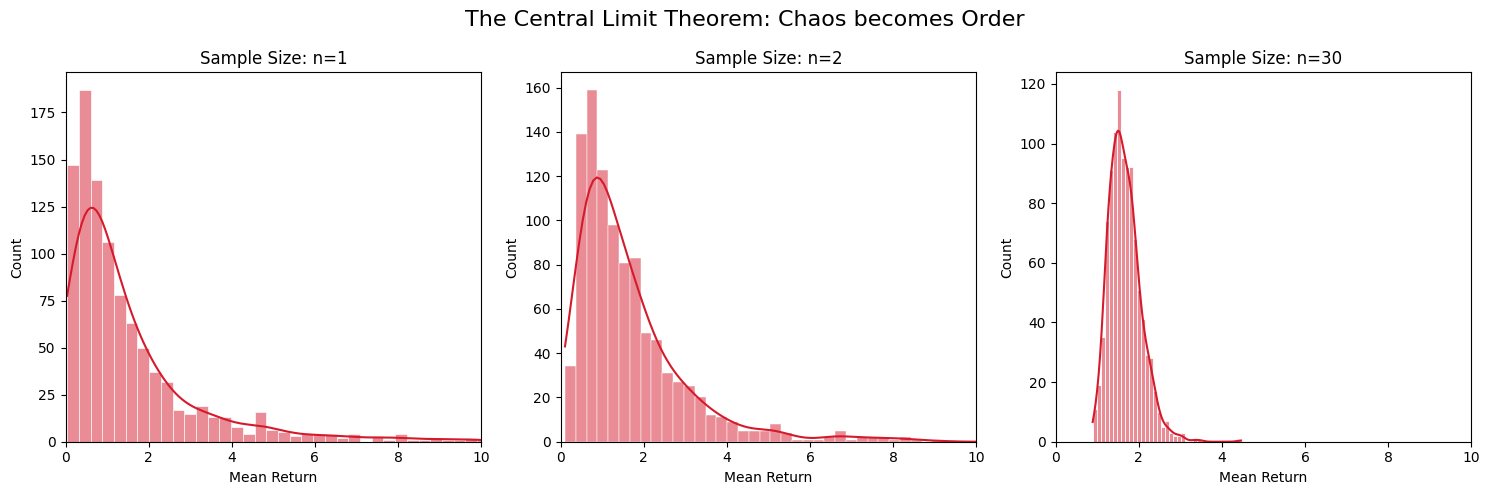

In [42]:
sample_sizes = [1, 2, 30]
simulations = 1000

plt.figure(figsize=(15, 5))

for i, n in enumerate(sample_sizes):
    means = []
    for _ in range(simulations):
        sample = np.random.choice(population_data, n)
        means.append(np.mean(sample))

    plt.subplot(1, 3, i+1)
    sns.histplot(means, kde=True, color='#d41b2c', edgecolor='white')
    plt.title(f"Sample Size: n={n}")
    plt.xlabel("Mean Return")
    plt.xlim(0, 10)

plt.suptitle("The Central Limit Theorem: Chaos becomes Order", fontsize=16)
plt.tight_layout()
plt.show()

In [29]:
std_dev = 15000
n = 100

margin_error = 1.96 * std_dev / np.sqrt(n)

print(f"--- The Soup Analogy ---")
print(f"Population: 1,000 users   | Margin of Error: ±${margin_error:,.2f}")
print(f"Population: 1,000,000 users | Margin of Error: ±${margin_error:,.2f}")
print(f"Conclusion: The pot size doesn't matter. Only the spoon size (n) matters.")

--- The Soup Analogy ---
Population: 1,000 users   | Margin of Error: ±$2,940.00
Population: 1,000,000 users | Margin of Error: ±$2,940.00
Conclusion: The pot size doesn't matter. Only the spoon size (n) matters.


In [30]:
# Metric: LTV/CAC Ratio (Target > 3.0)
mean_val = 4.0
n_samples = 50

# Compare Stable (A) vs Volatile (B) Companies
sigma_A = 0.5  # Stable
sigma_B = 6.0  # Volatile

moe_A = 1.96 * sigma_A / np.sqrt(n)
moe_B = 1.96 * sigma_B / np.sqrt(n)

print("\n--- VC Audit: Series C Benchmark (> 3.0) ---")

print(f"Startup A (Stable):")
print(f"   95% CI: [{mean_val - moe_A:.1f}, {mean_val + moe_A:.1f}]")
print(f"   Decision: INVEST. (Lower bound > 3.0)")

print(f"\nStartup B (Volatile):")
print(f"   95% CI: [{mean_val - moe_B:.1f}, {mean_val + moe_B:.1f}]")
print(f"   Decision: PASS. (Lower bound implies potential loss)")


--- VC Audit: Series C Benchmark (> 3.0) ---
Startup A (Stable):
   95% CI: [3.9, 4.1]
   Decision: INVEST. (Lower bound > 3.0)

Startup B (Volatile):
   95% CI: [2.8, 5.2]
   Decision: PASS. (Lower bound implies potential loss)


In [38]:
import numpy as np

# BASE CASE: Independence Assumption (The "Naive" Model)
n_simulations = 1000
months = 24
start_cash = 600_000
bankruptcies = 0

print("Running Base Model (Independence)...")

for _ in range(n_simulations):
    cash = start_cash
    alive = True

    for month in range(months):
        # SIMULATION LOGIC:
        # Revenue: Average $80k, swings wildly (StdDev $30k)
        # Burn: Average $100k, fairly fixed (StdDev $10k)
        # INDEPENDENT: Bad revenue months don't automatically trigger cost cuts.

        revenue = np.random.normal(80000, 30000)
        burn = np.random.normal(100000, 10000)

        # Net Flow
        cash += (revenue - burn)

        if cash <= 0:
            alive = False
            break

    if not alive:
        bankruptcies += 1

prob_ruin = bankruptcies / n_simulations
print(f"Base Model Risk of Ruin: {prob_ruin:.1%}")
print("Critique: This assumes if Revenue crashes, Management keeps spending money. Unrealistic.")

Running Base Model (Independence)...
Base Model Risk of Ruin: 21.8%
Critique: This assumes if Revenue crashes, Management keeps spending money. Unrealistic.


In [39]:
import numpy as np

# BASE SETTINGS
n_simulations = 1000
months = 24
start_cash = 600_000
bankruptcies = 0

# Parameters
mean_revenue = 80000
mean_burn = 100000

std_revenue = 30000
std_burn = 10000

rho = 0.7  # Correlation

# Mean vector
means = [mean_revenue, mean_burn]

# Covariance matrix
cov_matrix = [
    [std_revenue**2, rho * std_revenue * std_burn],
    [rho * std_revenue * std_burn, std_burn**2]
]

print("Running Correlated Model (rho = 0.7)...")

for _ in range(n_simulations):
    cash = start_cash
    alive = True

    for month in range(months):
        # Generate correlated Revenue and Burn
        revenue, burn = np.random.multivariate_normal(means, cov_matrix)

        # Net Flow
        cash += (revenue - burn)

        if cash <= 0:
            alive = False
            break

    if not alive:
        bankruptcies += 1

prob_ruin = bankruptcies / n_simulations
print(f"Correlated Model Risk of Ruin: {prob_ruin:.1%}")


Running Correlated Model (rho = 0.7)...
Correlated Model Risk of Ruin: 15.5%


The correlated model lowers the Probability of Ruin compared to the independent model. The reason lies in how correlation affects the volatility of net cash flow. Each month, the company’s financial outcome depends on revenue minus burn. When revenue and burn are independent, bad revenue months can occur while expenses remain high, creating large negative shocks to cash. These extreme downside combinations increase the likelihood of bankruptcy over time.

When revenue and burn are positively correlated (ρ = 0.7), they tend to move in the same direction. If revenue falls, burn also tends to fall. If revenue rises, burn tends to rise as well. This reduces the size of extreme losses because costs partially adjust to performance. Mathematically, the variance of net cash flow is given by Var(R − B) = Var(R) + Var(B) − 2Cov(R,B). When covariance is positive, the subtraction term reduces overall variance. Lower variance means fewer extreme negative outcomes.

Because bankruptcy is a tail event — it happens only when cumulative losses become very large — reducing volatility significantly lowers the probability of ruin. In this model, positive correlation acts like a natural hedge. It stabilizes cash flow and makes catastrophic scenarios far less likely compared to the independent case.